# Осциллятор Якоби
## Преобразрование Кремоны

In [1]:
var("p,q,r, pp, qq, rr, dt, k, c1,c2")

(p, q, r, pp, qq, rr, dt, k, c1, c2)

In [2]:
eqs=[pp-p==(rr*q+r*qq)*dt/2, qq-q==-(pp*r+p*rr)*dt/2, rr-r==-k^2*(pp*q+p*qq)*dt/2]

In [3]:
S1=solve(eqs,[pp,qq,rr])[0]
S1

[pp == (dt^2*k^2*p^3 + dt^2*k^2*p*q^2 + dt^2*p*r^2 - 4*dt*q*r - 4*p)/(dt^3*k^2*p*q*r + dt^2*k^2*p^2 - dt^2*k^2*q^2 - dt^2*r^2 - 4),
 qq == -(dt^2*k^2*q^3 - dt^2*q*r^2 - 4*dt*p*r + (dt^2*k^2*p^2 + 4)*q)/(dt^3*k^2*p*q*r + dt^2*k^2*p^2 - dt^2*k^2*q^2 - dt^2*r^2 - 4),
 rr == (4*dt*k^2*p*q - dt^2*r^3 - (dt^2*k^2*p^2 - dt^2*k^2*q^2 + 4)*r)/(dt^3*k^2*p*q*r + dt^2*k^2*p^2 - dt^2*k^2*q^2 - dt^2*r^2 - 4)]

## Отыскание $\alpha$

In [4]:
u1=p^2+q^2 - c1*(1+k^2*dt^2/4*q^2)
u2=k^2*p^2+r^2 - c2*(1+dt^2/4*r^2)

In [5]:
S2=solve([u1,u2],[q,r])[3]
S2

[q == 2*sqrt((p^2 - c1)/(c1*dt^2*k^2 - 4)),
 r == 2*sqrt((k^2*p^2 - c2)/(c2*dt^2 - 4))]

In [6]:
((1/q^2/r^2).subs(S2)).full_simplify()

-1/16*(4*c2*dt^2 - (c1*c2*dt^4 - 4*c1*dt^2)*k^2 - 16)/(k^2*p^4 - (c1*k^2 + c2)*p^2 + c1*c2)

In [7]:
((1/q^2/r^2).subs(S2)).full_simplify().factor()

1/16*(c1*dt^2*k^2 - 4)*(c2*dt^2 - 4)/((k^2*p^2 - c2)*(p^2 - c1))

## Отыскание $\beta$

In [8]:
S3=solve([u1.subs(p=0),u2.subs(p=0)],[q,r])[3]
S3

[q == 2*sqrt(-c1/(c1*dt^2*k^2 - 4)), r == 2*sqrt(-c2/(c2*dt^2 - 4))]

In [9]:
(pp.subs(S1).subs(p=0).subs(S3)).full_simplify().factor()

-4*(c1*dt^2*k^2 - 4)*(c2*dt^2 - 4)*dt*sqrt(-c1/(c1*dt^2*k^2 - 4))*sqrt(-c2/(c2*dt^2 - 4))/(c1*c2*dt^4*k^2 - 16)

In [10]:
beta=pp.subs(S1).subs(p=0).subs(S3)/dt

In [11]:
beta

-4*sqrt(-c1/(c1*dt^2*k^2 - 4))*sqrt(-c2/(c2*dt^2 - 4))/(c1*dt^2*k^2/(c1*dt^2*k^2 - 4) + c2*dt^2/(c2*dt^2 - 4) - 1)

## Квадратура

In [28]:
S=[k==1/5, c1==1, c2==1, dt==0.5]
L=[p==0,q==q.subs(S2).subs(S+[p==0]),r==r.subs(S2).subs(S+[p==0])]
P=pp.subs(S1).subs(S)
Q=qq.subs(S1).subs(S)
R=rr.subs(S1).subs(S)
du=(1/sqrt((c1-x^2)*(c2-k^2*x^2))).subs(S)
ans=[[p.subs(L),q.subs(L),r.subs(L)]]
quadrature=[]

for m in range(50):
    p0=p.subs(L)
    L=[p==P.subs(L),q==Q.subs(L), r==R.subs(L)]
    ans.append([p.subs(L),q.subs(L), r.subs(L)])
    quadrature.append([m*dt.subs(S), numerical_integral(du,(p0,p.subs(L)))[0]])

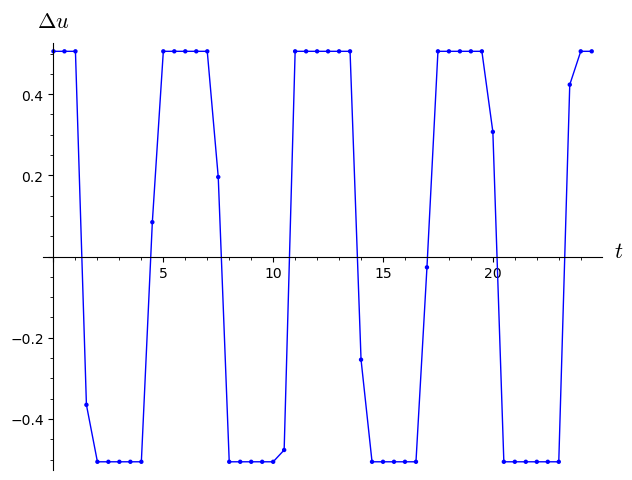

In [30]:
plot0=point(quadrature, axes_labels=["$t$","$\\Delta u$"])+line(quadrature)
plot0.save("plot-0.pdf")
plot0

In [31]:
quadrature

[[0, 0.5055731263682824],
 [0.500000000000000, 0.5055731263682829],
 [1.00000000000000, 0.5055731263683142],
 [1.50000000000000, -0.3652761896696482],
 [2.00000000000000, -0.505573126368283],
 [2.50000000000000, -0.5055731263682829],
 [3.00000000000000, -0.5055731263682824],
 [3.50000000000000, -0.5055731263682833],
 [4.00000000000000, -0.5055731263682837],
 [4.50000000000000, 0.08468231627237305],
 [5.00000000000000, 0.5055731263682841],
 [5.50000000000000, 0.5055731263682836],
 [6.00000000000000, 0.5055731263682829],
 [6.50000000000000, 0.5055731263682829],
 [7.00000000000000, 0.5055731263682832],
 [7.50000000000000, 0.19591155712489808],
 [8.00000000000000, -0.5055731263682848],
 [8.50000000000000, -0.5055731263682831],
 [9.00000000000000, -0.5055731263682831],
 [9.50000000000000, -0.5055731263682834],
 [10.0000000000000, -0.5055731263682842],
 [10.5000000000000, -0.4765054305222334],
 [11.0000000000000, 0.5055731263683981],
 [11.5000000000000, 0.5055731263682838],
 [12.000000000000

## Период

In [84]:
S=[k==1/5, c1==1, c2==1]
M=5
N=1

verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 67 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'Unable to compute f(3.0)'


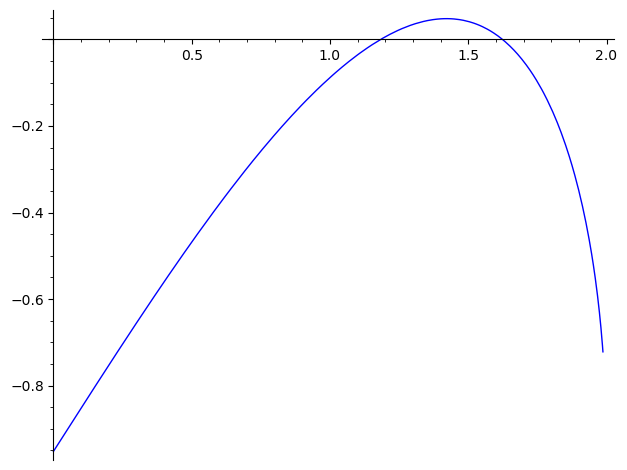

In [85]:
omega=(4*elliptic_kc(k^2*c1/c2)).subs(S)
eq=(beta*dt - sqrt(c1)*(jacobi_sn(N*omega/M,k^2*c1/c2))).subs(S)
plot(eq,(dt,0,3))

In [86]:
tau=eq.find_root(0,1.5)
tau

1.183414993794253

In [87]:
L=[p==0,q==q.subs(S2).subs([p==0, dt==tau]+S),r==r.subs(S2).subs([p==0, dt==tau]+S)]
P=pp.subs(S1).subs(S+[dt==tau])
Q=qq.subs(S1).subs(S+[dt==tau])
R=rr.subs(S1).subs(S+[dt==tau])
ans=[[p.subs(L),q.subs(L),r.subs(L)]]

for m in range(M):
    p0=p.subs(L)
    L=[p==P.subs(L),q==Q.subs(L), r==R.subs(L)]
    ans.append([p.subs(L),q.subs(L), r.subs(L)])
    print(numerical_integral(1/sqrt((c1-x^2)*(c2-k^2*x^2)).subs(S),(p0,p.subs(L))))
#    print((p^2+q^2 - 1 - tau^2/4*kk^2*q^2).subs(L))
ans

(1.2694942779633371, 1.4094217770247853e-14)
(-0.6347471389816793, 7.0471088851240465e-15)
(-1.2694942779633376, 1.409421777024786e-14)
(-0.6347471389816365, 7.047108885123571e-15)
(1.269494277963338, 1.4094217770247864e-14)


[[0, 1.0070767737246602, 1.24045971934659],
 [0.95197717204663, 0.30833570080798817, 1.2177685865542254],
 [0.5917074968971181, -0.8118576992206922, 1.231742953179991],
 [-0.5917074968971353, -0.8118576992206794, 1.2317429531799906],
 [-0.9519771720466237, 0.30833570080800876, 1.2177685865542258],
 [2.218189919634461e-14, 1.0070767737246606, 1.2404597193465903]]

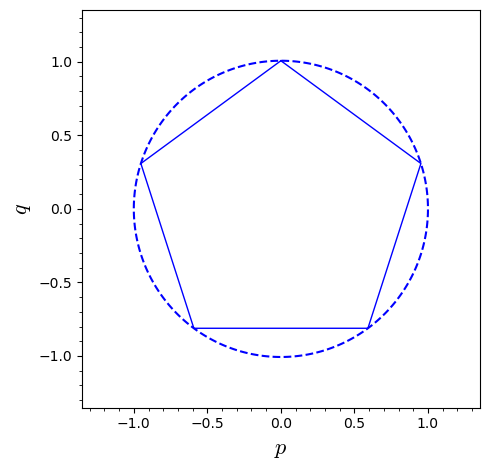

In [88]:
plot1=line([[P,Q] for [P,Q,R] in ans], axes_labels=['$p$','$q$']) +\
implicit_plot((p^2+q^2==c1*(1+k^2*dt^2/4*q^2)).subs(S+[dt==tau]),(p,-1.3,1.3),(q,-1.3,1.3), linestyle='--')
plot1.save("plot-5-1.pdf")
plot1


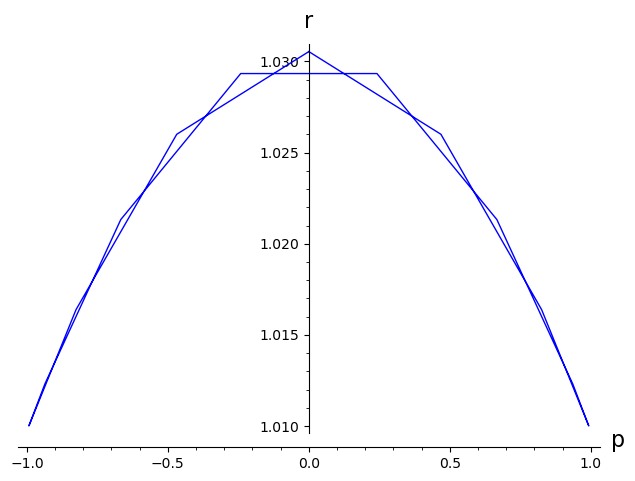

In [56]:
line([[P,R] for [P,Q,R] in ans], axes_labels=['p','r'])

In [29]:
1.2756042923739173*5

6.378021461869587

In [30]:
numerical_integral(1/sqrt((1-x^2)*(1-kk^2*x^2)),(0.953503296763514,1))[0]+numerical_integral(1/sqrt((1-x^2)*(1-kk^2*x^2)),(0.605720322930236,1))[0]

1.246754278105403